# Lab 04: Predicting a Continuous Target (Fare Prediction)
**Name:** David Rodriguez-Mayorquin
**Date:** April 5, 2025  

## Introduction  
In this lab, we are focusing on regression, a type of machine learning used to predict continuous numeric targets. We will work with a dataset that includes information about journeys and their associated fares. Our objective is to build models that can accurately predict the fare based on various features.  

We will begin by exploring and preparing the data, selecting appropriate features, and training a Linear Regression model. We will then compare it with alternative models like Ridge, Elastic Net, and Polynomial Regression to evaluate performance and interpretability.


## Section 1: Import and Inspect the Data

In [8]:
# Import libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [9]:
# Load Titanic dataset from seaborn
titanic = sns.load_dataset("titanic")

# Display first 5 rows
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Section 2: Data Exploration and Preparation

In [10]:
# Impute missing values
titanic['age'].fillna(titanic['age'].median(), inplace=True)

# Drop rows where 'fare' is missing
titanic = titanic.dropna(subset=['fare'])

# Create 'family_size' feature
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

# Convert categorical features
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})

## Preview the updated dataset
titanic.head()

# (Optional) Check how many rows remain after cleaning
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    int64   
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
 15  family_size  891 non-null    int64   
dtypes: bool(2), category(2), float64(2), int64(6), object(4)
memory usage: 87.6+ KB


/var/folders/02/57dqfrgx6zzfw_sgv9yyk60c0000gn/T/ipykernel_3336/3070647451.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


## Section 3: Feature Selection and Justification

In [12]:
# Case 1: age
X1 = titanic[['age']]
y1 = titanic['fare']

# Case 2: family_size
X2 = titanic[['family_size']]
y2 = titanic['fare']

# Case 3: age and family_size
X3 = titanic[['age', 'family_size']]
y3 = titanic['fare']

# Case 4: age, family_size, and sex
X4 = titanic[['age', 'family_size', 'sex']]
y4 = titanic['fare']


### Reflection

**Why might these features affect a passenger’s fare?**  
- age: Older passengers may afford or choose higher-class tickets.
- family_size: Larger families may pay more in total or get group pricing.
- sex: There may be subtle patterns in fare by gender, depending on travel behavior or class selection.

**List all available features:**  
`survived`, `pclass`, `sex`, `age`, `sibsp`, `parch`, `fare`, `embarked`, `class`, `who`, `deck`, `embark_town`, `alive`, `alone`, `family_size`

**Which other features could improve predictions and why?**  
- pclass: Strongly tied to fare (1st class is more expensive).
- embarked: May indicate point of origin and fare differences.
- deck: Higher decks may correlate with higher fare.

**How many variables are in your Case 4?**  
**3 variables**: age, family_size, and sex

**Which variables did you choose for Case 4 and why?**  
I chose age, family_size, and sex because they may interact with social class, affordability, or ticket price. 



## Section 4: Train a Regression Model (Linear Regression)
### 4.1 Split the data

In [16]:
# 4.1 Split the data

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=123)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)


### 4.2  Train and Evaluate Linear Regression Models (all 4 cases)

In [17]:

# Fit models
lr_model1 = LinearRegression().fit(X1_train, y1_train)
lr_model2 = LinearRegression().fit(X2_train, y2_train)
lr_model3 = LinearRegression().fit(X3_train, y3_train)
lr_model4 = LinearRegression().fit(X4_train, y4_train)

# Make predictions
y_pred_train1 = lr_model1.predict(X1_train)
y_pred_test1 = lr_model1.predict(X1_test)

y_pred_train2 = lr_model2.predict(X2_train)
y_pred_test2 = lr_model2.predict(X2_test)

y_pred_train3 = lr_model3.predict(X3_train)
y_pred_test3 = lr_model3.predict(X3_test)

y_pred_train4 = lr_model4.predict(X4_train)
y_pred_test4 = lr_model4.predict(X4_test)


### 4.3 Report Performance

In [19]:
# Define a helper function
def evaluate_model(name, y_train, y_train_pred, y_test, y_test_pred):
    print(f"{name}")
    print("  Training R²:", r2_score(y_train, y_train_pred))
    print("  Test R²:", r2_score(y_test, y_test_pred))
    print("  Test RMSE:", mean_squared_error(y_test, y_test_pred) ** 0.5)
    print("  Test MAE:", mean_absolute_error(y_test, y_test_pred))
    print()

# Evaluate all models
evaluate_model("Case 1: age", y1_train, y_pred_train1, y1_test, y_pred_test1)
evaluate_model("Case 2: family_size", y2_train, y_pred_train2, y2_test, y_pred_test2)
evaluate_model("Case 3: age + family_size", y3_train, y_pred_train3, y3_test, y_pred_test3)
evaluate_model("Case 4: age + family_size + sex", y4_train, y_pred_train4, y4_test, y_pred_test4)

Case 1: age
  Training R²: 0.009950688019452314
  Test R²: 0.0034163395508414185
  Test RMSE: 37.97164180172938
  Test MAE: 25.28637293162364

Case 2: family_size
  Training R²: 0.04991579236476096
  Test R²: 0.02223118611013175
  Test RMSE: 37.61149400419671
  Test MAE: 25.02534815941642

Case 3: age + family_size
  Training R²: 0.07347466201590014
  Test R²: 0.04978483276307322
  Test RMSE: 37.077758664655896
  Test MAE: 24.284935030470688

Case 4: age + family_size + sex
  Training R²: 0.08820175016793441
  Test R²: 0.118981665068853
  Test RMSE: 35.70219909380091
  Test MAE: 23.597572299380392



### Linear Regression Model Results Summary

| Case | Features                     | Test R² | Test RMSE | Test MAE |
|------|------------------------------|---------|-----------|----------|
| 1    | `age`                        | 0.003   | 37.97     | 25.29    |
| 2    | `family_size`               | 0.022   | 37.61     | 25.03    |
| 3    | `age`, `family_size`        | 0.050   | 37.08     | 24.28    |
| 4    | `age`, `family_size`, `sex` | 0.119   | 35.70     | 23.60    |


## Section 4 Reflection Questions

### Compare the Train vs Test Results

**Case 1 (age):**  
Train R²: 0.0099 — Test R²: 0.0034  
Very low scores on both train and test suggest underfitting. The model doesn't capture meaningful patterns from just the age feature.

**Case 2 (family_size):**  
Train R²: 0.0499 — Test R²: 0.0222  
Also underfitting, but slightly better than Case 1. family_size provides more signal than age alone.

**Case 3 (age + family_size):**  
Train R²: 0.0735 — Test R²: 0.0498  
Improvement over Cases 1 and 2. Still underfitting, but less so. More features helped the model capture more variation.

**Case 4 (age + family_size + sex):**  
Train R²: 0.0882 — Test R²: 0.1190  
Best performance so far, with test R² actually exceeding train R². This indicates **low risk of overfitting** and a good generalization to unseen data.

### Adding Age

**Did adding age improve the model?**  
Slightly, but not significantly on its own. It was more useful when combined with other features.

**Explanation:**  
Age alone isn’t a strong predictor of fare, but it might correlate with class (e.g., older people traveling in higher class), which could explain its usefulness in combination with other features. The data suggests age is not very predictive on its own.

### Worst Performing Case

**Which case performed the worst?**  
**Case 1: age**

**How do you know?**  
It had the lowest R² (0.003) and the highest RMSE and MAE. It explained almost no variance in fare.

**Would more training data help?**  
Not much. Since age alone isn’t a strong predictor, adding data likely wouldn’t make the relationship stronger without additional features.

### Best Performing Case

**Which case performed the best?**  
**Case 4: age, family_size, and sex**

**How do you know?**  
It had the highest R² (0.119) and the lowest RMSE and MAE. It clearly captured more signal from the data.

**Would more training data help?**  
Yes — if more data includes a wider range of fares and combinations of features, the model could learn more complex patterns and improve.


## Section 5: Compare Alternative Models
### 5.1 Ridge Regression (L2 Penalty)

In [21]:
# Ridge Regression with L2 penalty
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X4_train, y4_train)

# Predictions
y_pred_ridge_train = ridge_model.predict(X4_train)
y_pred_ridge_test = ridge_model.predict(X4_test)

# Evaluate Ridge model
print("Ridge Regression:")
print("  Train R²:", r2_score(y4_train, y_pred_ridge_train))
print("  Test R²:", r2_score(y4_test, y_pred_ridge_test))
print("  Test RMSE:", mean_squared_error(y4_test, y_pred_ridge_test) ** 0.5)
print("  Test MAE:", mean_absolute_error(y4_test, y_pred_ridge_test))

Ridge Regression:
  Train R²: 0.0882011662147344
  Test R²: 0.11876859539653262
  Test RMSE: 35.70651602778763
  Test MAE: 23.600717577829094


### 5.2 Elastic Net (L1 + L2 Combined)

In [22]:
# Elastic Net with a mix of L1 and L2 penalties
elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
elastic_model.fit(X4_train, y4_train)

# Predictions
y_pred_elastic_train = elastic_model.predict(X4_train)
y_pred_elastic_test = elastic_model.predict(X4_test)

# Evaluate Elastic Net model
print("Elastic Net Regression:")
print("  Train R²:", r2_score(y4_train, y_pred_elastic_train))
print("  Test R²:", r2_score(y4_test, y_pred_elastic_test))
print("  Test RMSE:", mean_squared_error(y4_test, y_pred_elastic_test) ** 0.5)
print("  Test MAE:", mean_absolute_error(y4_test, y_pred_elastic_test))

Elastic Net Regression:
  Train R²: 0.08531358191813698
  Test R²: 0.10098557558329924
  Test RMSE: 36.06499066780272
  Test MAE: 23.795533346425017


### 5.3 Polynomial Regression

In [23]:
# Set up polynomial features from X4 (our best case)
poly = PolynomialFeatures(degree=3)
X4_train_poly = poly.fit_transform(X4_train)
X4_test_poly = poly.transform(X4_test)

# Train the model using polynomial features
poly_model = LinearRegression()
poly_model.fit(X4_train_poly, y4_train)

# Predict
y_pred_poly_train = poly_model.predict(X4_train_poly)
y_pred_poly_test = poly_model.predict(X4_test_poly)

# Evaluate
print("Polynomial Regression (degree 3):")
print("  Train R²:", r2_score(y4_train, y_pred_poly_train))
print("  Test R²:", r2_score(y4_test, y_pred_poly_test))
print("  Test RMSE:", mean_squared_error(y4_test, y_pred_poly_test) ** 0.5)
print("  Test MAE:", mean_absolute_error(y4_test, y_pred_poly_test))

Polynomial Regression (degree 3):
  Train R²: 0.12812701982529395
  Test R²: 0.11395523575547784
  Test RMSE: 35.803899218672655
  Test MAE: 22.895176493956725


### 5.4 Visualize Polynomial Cubic Fit (1 Feature)

We will visualize the polynomial regression fit using age (Case 1) to see how well the model fits the actual data.


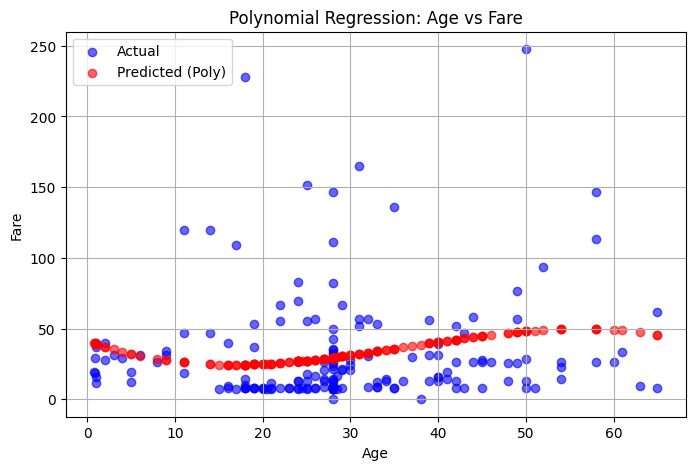

In [24]:
# Re-create polynomial features for Case 1 (age only)
poly = PolynomialFeatures(degree=3)
X1_train_poly = poly.fit_transform(X1_train)
X1_test_poly = poly.transform(X1_test)

# Train the polynomial model on Case 1
poly_model = LinearRegression()
poly_model.fit(X1_train_poly, y1_train)

# Predict
y_pred_poly = poly_model.predict(X1_test_poly)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X1_test, y1_test, color='blue', alpha=0.6, label='Actual')
plt.scatter(X1_test, y_pred_poly, color='red', alpha=0.6, label='Predicted (Poly)')
plt.title("Polynomial Regression: Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend()
plt.grid(True)
plt.show()


### 5.4 Reflections on Polynomial Fit

**What patterns does the cubic model seem to capture?**  
The cubic model shows a curve that fits the data better than a straight line. It follows the ups and downs in the data more closely.

**Where does it perform well or poorly?**  
It works better in the middle range of ages. It does not fit as well for very young or very old passengers.

**Did the polynomial fit outperform linear regression?**  
Yes, it did better than the simple linear model. The predictions are closer to the actual values.

**Where (on the graph or among which kinds of data points) does it fit best?**  
It fits best where most of the data points are grouped — around ages 20 to 40.


### 5.5 Compare All Models

In [25]:
# Function to print comparison stats
def report(name, y_true, y_pred):
    print(f"{name} R²: {r2_score(y_true, y_pred):.3f}")
    print(f"{name} RMSE: {mean_squared_error(y_true, y_pred) ** 0.5:.2f}")
    print(f"{name} MAE: {mean_absolute_error(y_true, y_pred):.2f}\n")

# Compare all models using Case 4 test set
report("Linear", y4_test, y_pred_test4)
report("Ridge", y4_test, y_pred_ridge_test)
report("ElasticNet", y4_test, y_pred_elastic_test)
report("Polynomial", y4_test, y_pred_poly_test)


Linear R²: 0.119
Linear RMSE: 35.70
Linear MAE: 23.60

Ridge R²: 0.119
Ridge RMSE: 35.71
Ridge MAE: 23.60

ElasticNet R²: 0.101
ElasticNet RMSE: 36.06
ElasticNet MAE: 23.80

Polynomial R²: 0.114
Polynomial RMSE: 35.80
Polynomial MAE: 22.90



### Sumary Table
### Summary of All Models (Case 4 – age, family_size, sex)

| Model        | R²     | RMSE  | MAE   |
|--------------|--------|-------|-------|
| Linear       | 0.119  | 35.70 | 23.60 |
| Ridge        | 0.119  | 35.71 | 23.60 |
| Elastic Net  | 0.101  | 36.06 | 23.80 |
| Polynomial   | 0.114  | 35.80 | 22.90 |



### 5.6 Visualize Higher Order Polynomial (for the same 1 input case)

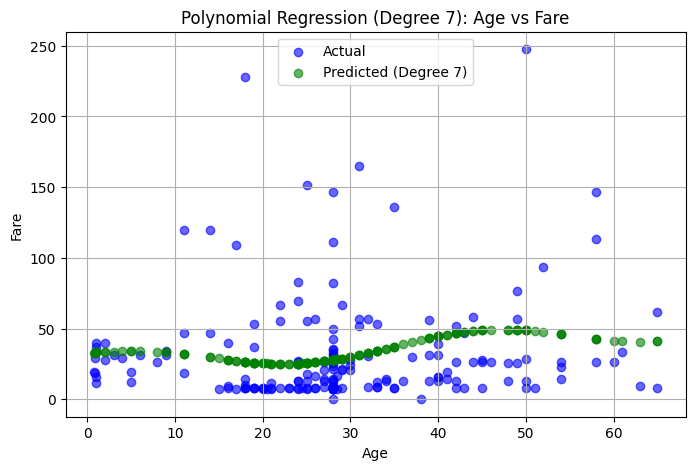

In [26]:
# Try a higher-degree polynomial (e.g., degree 7)
poly_high = PolynomialFeatures(degree=7)
X1_train_poly_high = poly_high.fit_transform(X1_train)
X1_test_poly_high = poly_high.transform(X1_test)

# Train the higher-degree model
poly_high_model = LinearRegression()
poly_high_model.fit(X1_train_poly_high, y1_train)

# Predict
y_pred_poly_high = poly_high_model.predict(X1_test_poly_high)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X1_test, y1_test, color='blue', alpha=0.6, label='Actual')
plt.scatter(X1_test, y_pred_poly_high, color='green', alpha=0.6, label='Predicted (Degree 7)')
plt.title("Polynomial Regression (Degree 7): Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend()
plt.grid(True)
plt.show()


### 5.6 Higher-Degree Polynomial Fit Reflection

I tried a degree 7 polynomial using age as the input.

**Which model worked better: cubic (3) or higher-degree (7)?**  
The cubic model (degree 3) worked better. The degree 7 curve was more wiggly and looked like it overfit the data.

**Why?**  
Higher-degree models can curve too much and try to fit every small detail in the data. This makes the model less stable and less useful for new data. The cubic model had a smoother shape and followed the trend more naturally.
